<a href="https://colab.research.google.com/github/Venkateshwarlu978/Venkateshwarlu978/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
X=6*np.random.rand(100-1)-3
y=0.5*X**2+1.5*X+2+np.random.randn(100-1)
#quadratic equation used : y=0.5x^2+1.5X+2+outliers

Text(0, 0.5, 'y dataset')

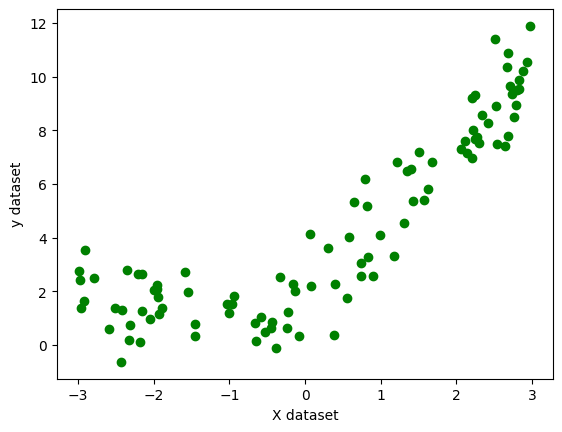

In [25]:
plt.scatter(X,y,color='g')
plt.xlabel("X dataset")
plt.ylabel("y dataset")

In [26]:
X = X.reshape(-1, 1)

In [27]:
X = np.expand_dims(X, axis=1)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [29]:
##lets implement simple linear regression
from sklearn.linear_model import LinearRegression
regression_1=LinearRegression()

In [31]:
# Suppose X_train has shape (n_samples, a, b). You can reshape to (n_samples, a*b):
X_train = X_train.reshape(X_train.shape[0], -1)


In [32]:
regression_1.fit(X_train,y_train)

LinearRegression()

In [35]:
X_test2 = X_test.reshape(X_test.shape[0], -1)
# or equivalently: X_test2 = X_test.reshape(n, a*b)


In [37]:
from sklearn.metrics import r2_score
sscore=r2_score(y_test,regression_1.predict(X_test2))
print(sscore)

0.7283212465769371


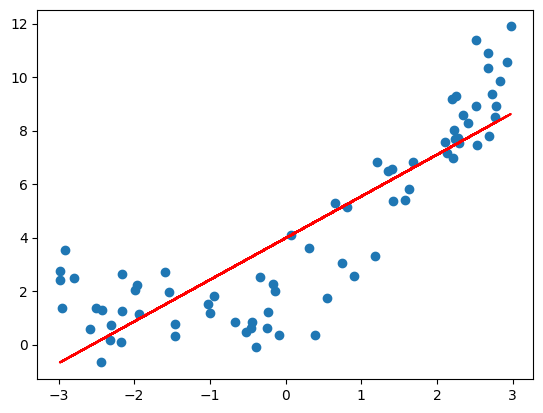

In [38]:
#lets visualize this
plt.plot(X_train,regression_1.predict(X_train),color='r')
plt.scatter(X_train,y_train)

In [40]:
##Solving this with the help of polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [45]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test2)

In [46]:
X_train_poly

array([[ 1.00000000e+00, -2.42184970e+00,  5.86535598e+00],
       [ 1.00000000e+00, -2.15594923e+00,  4.64811710e+00],
       [ 1.00000000e+00,  1.68161431e+00,  2.82782669e+00],
       [ 1.00000000e+00,  2.97699664e+00,  8.86250900e+00],
       [ 1.00000000e+00, -2.95782917e+00,  8.74875342e+00],
       [ 1.00000000e+00, -3.90134612e-01,  1.52205015e-01],
       [ 1.00000000e+00, -4.43588111e-01,  1.96770412e-01],
       [ 1.00000000e+00,  1.57748088e+00,  2.48844592e+00],
       [ 1.00000000e+00,  2.41591820e+00,  5.83666073e+00],
       [ 1.00000000e+00,  8.13662172e-01,  6.62046130e-01],
       [ 1.00000000e+00, -6.67651577e-01,  4.45758629e-01],
       [ 1.00000000e+00, -2.91389397e+00,  8.49077809e+00],
       [ 1.00000000e+00,  6.47180365e-01,  4.18842425e-01],
       [ 1.00000000e+00,  1.40489255e+00,  1.97372308e+00],
       [ 1.00000000e+00, -1.36859264e-01,  1.87304583e-02],
       [ 1.00000000e+00, -4.52431287e-01,  2.04694070e-01],
       [ 1.00000000e+00, -9.40636840e-01

In [47]:
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.8964120604040897


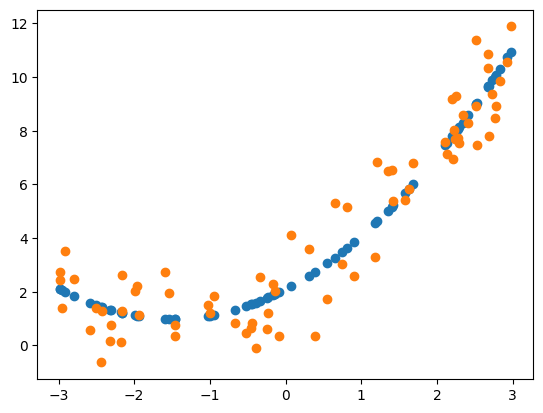

In [55]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [63]:
#lets degree=3
poly=PolynomialFeatures(degree=3,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test2)

In [64]:
X_train_poly # now we are getting 4 features

array([[ 1.00000000e+00, -2.42184970e+00,  5.86535598e+00,
        -1.42050106e+01],
       [ 1.00000000e+00, -2.15594923e+00,  4.64811710e+00,
        -1.00211045e+01],
       [ 1.00000000e+00,  1.68161431e+00,  2.82782669e+00,
         4.75531384e+00],
       [ 1.00000000e+00,  2.97699664e+00,  8.86250900e+00,
         2.63836595e+01],
       [ 1.00000000e+00, -2.95782917e+00,  8.74875342e+00,
        -2.58773181e+01],
       [ 1.00000000e+00, -3.90134612e-01,  1.52205015e-01,
        -5.93804446e-02],
       [ 1.00000000e+00, -4.43588111e-01,  1.96770412e-01,
        -8.72850152e-02],
       [ 1.00000000e+00,  1.57748088e+00,  2.48844592e+00,
         3.92547586e+00],
       [ 1.00000000e+00,  2.41591820e+00,  5.83666073e+00,
         1.41008949e+01],
       [ 1.00000000e+00,  8.13662172e-01,  6.62046130e-01,
         5.38681892e-01],
       [ 1.00000000e+00, -6.67651577e-01,  4.45758629e-01,
        -2.97611452e-01],
       [ 1.00000000e+00, -2.91389397e+00,  8.49077809e+00,
      

In [65]:
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.8991975717021804


In [66]:
#prediction for new dataset
X_new=np.linspace(-3,3,200).reshape(200, 1)
X_new_poly=poly.transform(X_new)

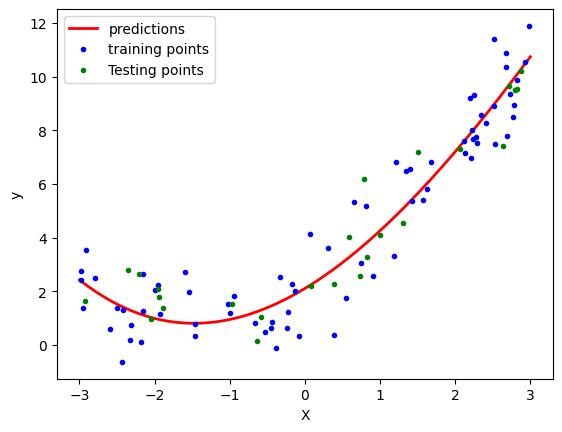

In [68]:
y_new=regression.predict(X_new_poly)
plt.plot(X_new,y_new,'r-',linewidth=2,label="predictions")
plt.plot(X_train,y_train,"b.",label="training points")
plt.plot(X_test2,y_test,'g.',label="Testing points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()